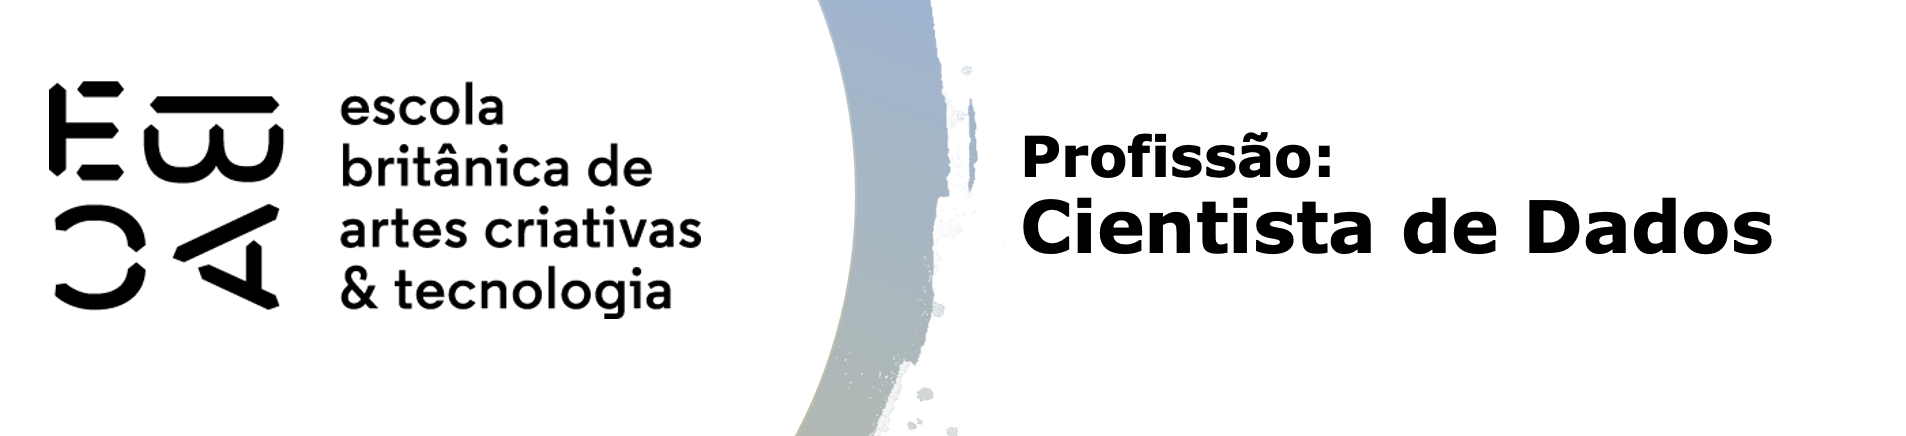

Módulo 21 <br> Professor: Lucas Serra 

# SQL em python


https://pypi.org/project/psycopg2/ <br>
https://www.psycopg.org/docs/

In [ ]:
!pip install psycopg2

In [ ]:
import psycopg2 as pg2
import pandas as pd

In [ ]:
conn = pg2.connect(host='localhost', port=5432, dbname='demo', user='postgres',password='senha123')

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("select * from ticket_flights")

In [ ]:
conn.commit()

In [ ]:
data = cur.fetchall()

In [ ]:
cur.close()
conn.close()

In [ ]:
data

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

In [ ]:
col_names = ['ticket_no', 'flight_id', 'fare_conditions', 'amount']

In [ ]:
df = pd.DataFrame(data, columns=col_names)
df

# DEMO Database
https://postgrespro.com/education/demodb

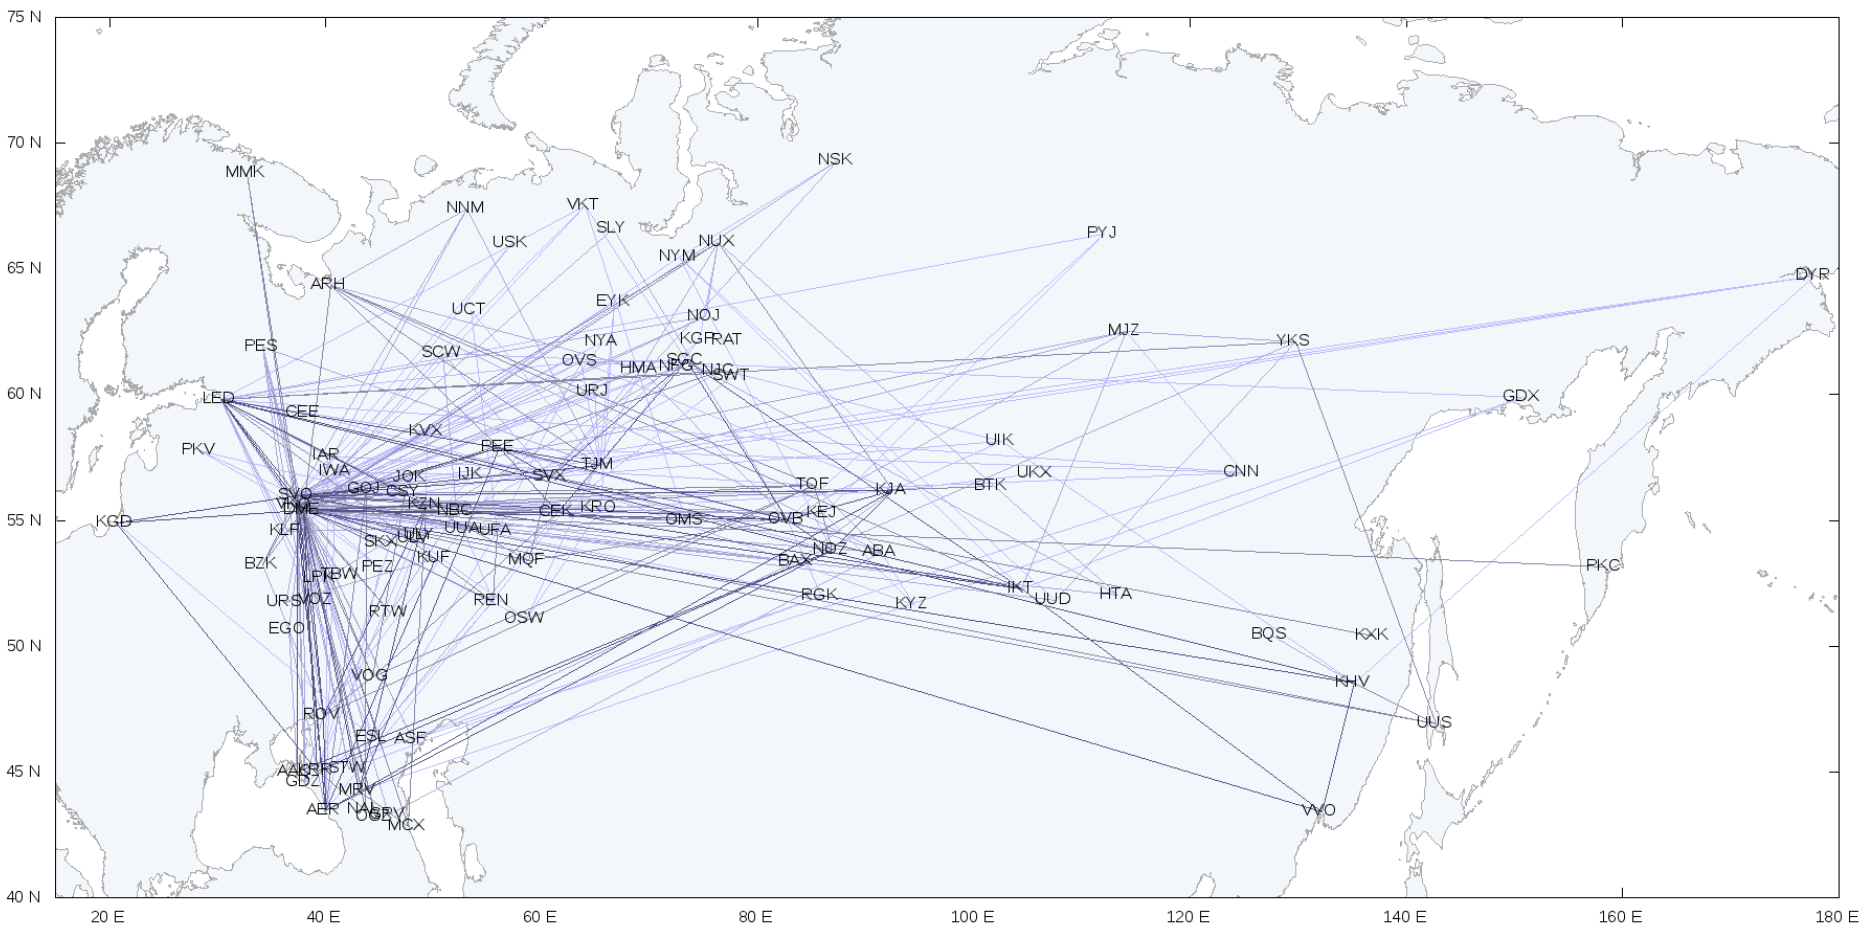

In [ ]:
df.head(10)

# DVD RENTAL

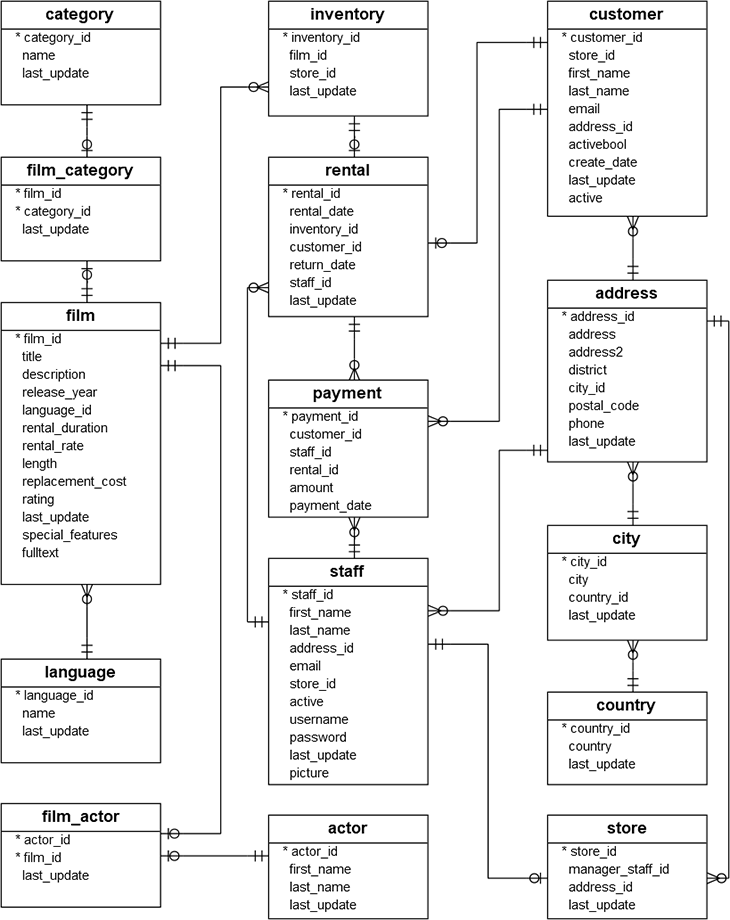

In [ ]:
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres',password='senha123')

cur = conn.cursor()

cur.execute("select * from actor")

conn.commit()

data = cur.fetchall()
colnames = [desc.name for desc in cur.description]
cur.close()
conn.close()

In [ ]:
cur.description

In [ ]:
df = pd.DataFrame(data, columns=colnames)
df.head()

In [ ]:
df.dtypes

### Calcule a média das seguintes variáveis por nome da categoria :  
- rental_duration
- rental_rate
- length
- replacement_cost

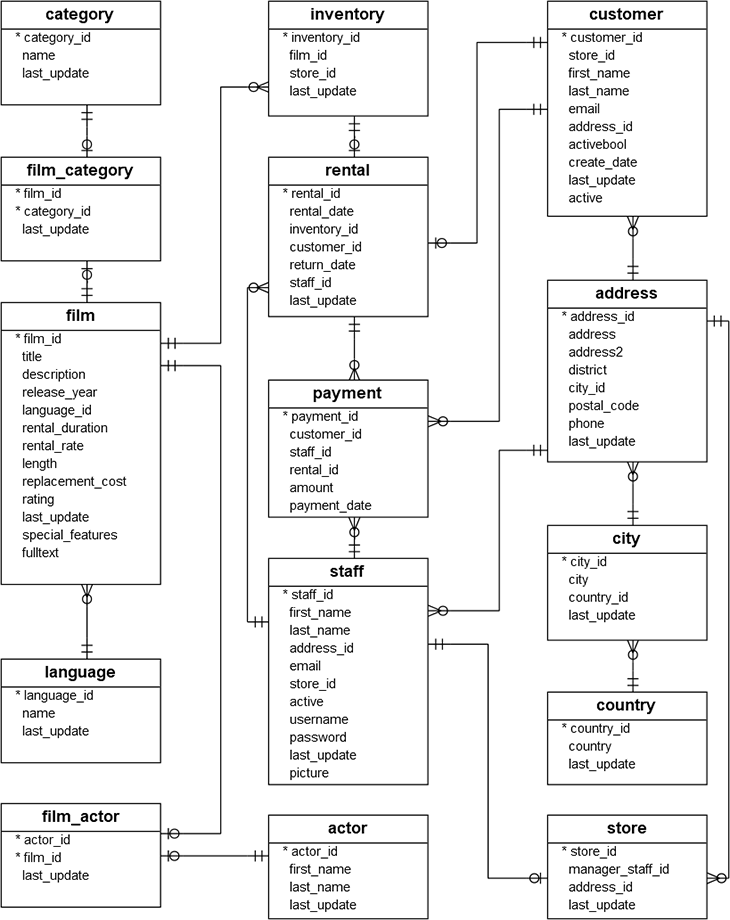

In [ ]:
conn = pg2.connect(host='localhost', port=5432, dbname='dvdrental', user='postgres',password='senha123')

cur = conn.cursor()

cur.execute('''SELECT *
                FROM film as a
                    LEFT JOIN film_category as b
                        on a.film_id = b.film_id
                    LEFT JOIN category as c
                        on b.category_id = c.category_id;''')

conn.commit()

data = cur.fetchall()
colnames = [desc.name for desc in cur.description]
cur.close()
conn.close()

In [ ]:
df = pd.DataFrame(data, columns=colnames)
df.head()


In [ ]:
df.shape

In [ ]:
df[['name', 'rental_duration', 'rental_rate', 'length',
    'replacement_cost']].groupby('name').mean()

In [ ]:
df[['name', 'rental_duration', 'rental_rate', 'length',
    'replacement_cost']].dtypes

In [ ]:
df['rental_rate'] = df['rental_rate'].astype(float)
df['replacement_cost'] = df['replacement_cost'].astype(float)

In [ ]:
df[['name', 'rental_duration', 'rental_rate', 'length',
    'replacement_cost']].groupby('name').mean().sort_values('rental_duration')

# Criando funções

In [ ]:
def connect_to_postgres(dbname):
    conn = None
    try:
        print('Conectando no PostgreSQL')
        conn = pg2.connect(host='localhost', 
                           port=5432, 
                           dbname=dbname, 
                           user='postgres',
                           password='senha123')
        print("Conectado!")
        
    except Exception as e:
        print(e)       
        conn = None
    return conn




def get_results_postgres(conn, query, fetch = 'all'):
    colnames = None
    data = None
    
    try:
        print('Cursor criado')
        cur = conn.cursor()

        print('Enviando query')
        cur.execute(query)
        print('Query executada')
        conn.commit()

        if fetch=='all':
            data = cur.fetchall()
        elif fetch=='many':
            data = cur.fetchmany()
        elif fetch=='one':
            data = cur.fetchone()
        else:
            return None

        colnames = [desc.name for desc in cur.description]
        cur.close()
        conn.close()
    except Exception as e:
        print(e)
        cur.close()
        conn.close()
    return data, colnames

def to_df(data, colnames):
    print('Transformando em dataframe')
    df = pd.DataFrame(data, columns=colnames)
    print('DF OK')
    return df
    


In [ ]:
dbname = 'dvdrental'
query = '''SELECT *
            FROM film as a
                LEFT JOIN film_category as b
                    on a.film_id = b.film_id
                LEFT JOIN category as c
                    on b.category_id = c.category_id;'''

conn = connect_to_postgres(dbname)
data, colnames = get_results_postgres(conn, query, fetch = 'one')
df_results = to_df(data, colnames)

df_results.head(2)